<a href="https://colab.research.google.com/github/james-monahan/Stats_Calc_Workshop/blob/main/Math11_Stats_Int.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
import scipy.stats as stats
import statistics as stat
import statsmodels.stats.weightstats as mod
import statsmodels.stats.proportion as prop
import sklearn.linear_model as lm
from mpl_toolkits import mplot3d


#Law of Large Numbers
---



In [2]:
random.seed(54321)
sample_size = 1000 #100 #10
result_list = []
for i in range(sample_size):
    result = random.randint(0, 1)
    result_list.append(result)

In [3]:
num_of_heads = sum(result_list)
avg_of_heads = float(num_of_heads) / sample_size

In [4]:
print(f'Results: {num_of_heads} heads out of {sample_size} flips.')
print(f'Average number of heads per flip is {avg_of_heads}.')

Results: 492 heads out of 1000 flips.
Average number of heads per flip is 0.492.


In [5]:
sample_size = 20000
num_of_heads = 0
heads_list = []
trials_list = []
freq_list = []

for i in range(1,sample_size+1):
    result = random.randint(0, 1)
    if result == 1:
        num_of_heads += 1
    avg_of_heads = float(num_of_heads) / i
    heads_list.append(num_of_heads)
    trials_list.append(i)
    freq_list.append(avg_of_heads)

In [6]:
print(f'Results: {num_of_heads} heads out of {sample_size} flips.')
print(f'Average number of heads is {avg_of_heads}')

Results: 10001 heads out of 20000 flips.
Average number of heads is 0.50005


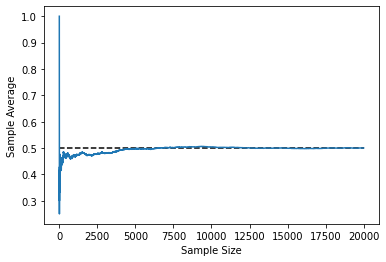

In [7]:
plt.plot(trials_list, freq_list)
plt.ylabel('Sample Average')
plt.xlabel('Sample Size')
plt.hlines(0.50,0,sample_size,linestyles='dashed')
plt.show()

#Roulette Simulation

In [8]:
# set the number of games of roulette you want to play
sample_size = 1000 #10
#set the amount of money you want to bet
bet = 1
# initialize the variables required for our loop
# 1 to 36 represent numbers on roulette wheel, 37 represents 0, 38 represents 00
net_money = 0
wins = 0
money_track = []
trials_track = []

In [9]:
# create a for loop and collect the results in a list
random.seed(54321)
for i in range(1,sample_size+1):
    result = random.randint(1,38)
    if result % 2 == 1 and result != 37:
        net_money += bet
        wins += 1
    else:
        net_money -= bet
    money_track.append(net_money/i)
    trials_track.append(i)

In [10]:
# print the results
print(f'Results: You won {wins} games out of \
{sample_size} and won an average of \
{net_money/sample_size} dollars per game')
print(f'Results: You are expected to win \
{((18/38)*bet+(20/38)*(-bet))} per game')

Results: You won 470 games out of 1000 and won an average of -0.06 dollars per game
Results: You are expected to win -0.05263157894736842 per game


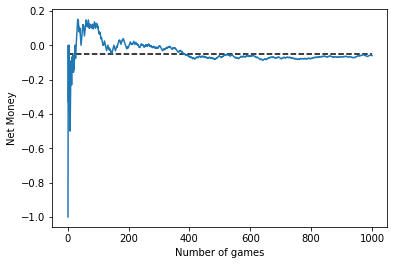

In [11]:
#create a simple line graph to show our results over time
plt.plot(trials_track, money_track)
plt.ylabel('Net Money')
plt.xlabel('Number of games')
plt.hlines(((18/38)*bet+(20/38)*(-bet)), 0, sample_size, linestyles='dashed')
plt.show()

#Central Limit Theorem

In [12]:
random.seed(54312)

# select the sample size you want to take
sample_size = 30
# select the number of sample mean you want to simulate
calc_means = 10000

mean_list = []
# run our loop and collect a sample
for j in range(calc_means):
    # initialize the variables to track our results
    sample_list = []
    for i in range(sample_size):
        sample_list.append(random.randint(0, 100))
    sample_mean = sum(sample_list) / sample_size
    mean_list.append(sample_mean)

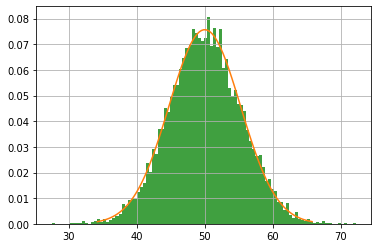

In [13]:
"""
create a histogram of our sample and compare it 
to what the CLT says it should be 
"""
n, bins, patches = plt.hist(mean_list, \
                            math.floor(math.sqrt(calc_means)),\
                            density=True, facecolor='g', alpha=0.75)
plt.grid(True)
mu = 50
sigma = math.sqrt(((100 ** 2) / 12)) / (math.sqrt(sample_size))
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

#Random Sampling from an Exponential Distribution

In [14]:
random.seed(54312)
# select the sample size you want to take
sample_size = 50
# select the number of sample mean you want to simulate
calc_means = 10000

mean_list = []
# run our loop and collect a sample
for j in range(calc_means):
    # initialize the variables to track our results
    sample_list = []
    for i in range(sample_size):
        draw = np.random.exponential(1)
        sample_list.append(draw)
    sample_mean = sum(sample_list) / sample_size
    mean_list.append(sample_mean)

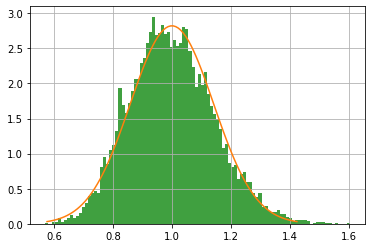

In [15]:
""" create a histogram of our sample and compare it to what the CLT says it should be """
n, bins, patches = plt.hist(mean_list, \
                   math.floor(math.sqrt(calc_means)), \
                   density=True, facecolor='g', \
                   alpha=0.75)
plt.grid(True)
mu = 1
sigma = 1 / (math.sqrt(sample_size))
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

#Confidance Intervals

In [16]:
# assumes knowledge of population std
# 30+ samples for z-confidance
def z_confidence_interval(data, st_dev, con_lvl):
    import statistics as st
    import scipy.stats as sp
    import math
    sample_mean = st.mean(data)
    n = len(data)
    crit_value = sp.norm.ppf(((1 - con_lvl) / 2) + \
                             con_lvl)
    lower_limit = sample_mean - (crit_value * \
                                 (st_dev/math.sqrt(n)))
    higher_limit = sample_mean + (crit_value * \
                                  (st_dev / math.sqrt(n)))
    print (f'Your {con_lvl} z confidence interval         is ({lower_limit}, {higher_limit})')
    return (lower_limit,higher_limit)

#Excercise: Finding confidence interval

In [17]:
# 30 focus groups with about 10 people in each group
# number who would vote in 10 person group
random.seed(39809)

sample_list = []
for i in range(30):
    sample_list.append(random.randint(0, 10))
z_confidence_interval(sample_list,2.89,0.95)

Your 0.95 z confidence interval         is (3.965845784931483, 6.034154215068517)


(3.965845784931483, 6.034154215068517)

#Small Sample Confidance

In [18]:
#less than 30 samples
#pop std is not know (use sample std)

def t_confidence_interval(data, con_lvl):
    import statistics as st
    import scipy.stats as sp
    import math
    sample_mean = st.mean(data)
    sample_st_dev = st.stdev(data)
    n = len(data)
    crit_value = sp.t.ppf(((1 - con_lvl) / 2) + \
                          con_lvl, n-1)
    lower_limit = sample_mean - (crit_value * \
                  (sample_st_dev/math.sqrt(n)))
    higher_limit = sample_mean + (crit_value * \
                   (sample_st_dev/math.sqrt(n)))
    print(f'Your {con_lvl} t confidence interval is \
({lower_limit},{higher_limit})')
    return (lower_limit,higher_limit)

In [19]:
t_confidence_interval(sample_list,0.95)

Your 0.95 t confidence interval is (3.827357936126168,6.172642063873832)


(3.827357936126168, 6.172642063873832)

#Confidence Interval for a Proportion

In [20]:
def prop_confidenct_interval(p_hat, n, con_lvl):
    import math
    import scipy.stats as sp
    crit_value = sp.norm.ppf(((1 - con_lvl) / 2) + \
                             con_lvl)
    lower_limit = p_hat - (crit_value * (math.sqrt(\
                 (p_hat * (1-p_hat)) / n)))
    higher_limit = p_hat + (crit_value * (math.sqrt(\
                  (p_hat * (1 - p_hat)) / n)))
    print(f'Your {con_lvl} proportional confidence \
    interval is ({lower_limit},{higher_limit})')
    return (lower_limit,higher_limit)

In [21]:
# 54% of the sample of 350 people saying they will vote for your candidate, 
# while your opponent got the other 46%
prop_confidenct_interval(0.54,350, 0.95)

Your 0.95 proportional confidence     interval is (0.4877856513683282,0.5922143486316719)


(0.4877856513683282, 0.5922143486316719)

#Hypothesis Testing

In [22]:
def z_test(sample, pop_st_dev, hypoth_value, \
           sig_level, test_type):
    sample_mean = stat.mean(sample)
    sample_size = len(sample)
    test_statistic = (sample_mean - hypoth_value) / \
                     (pop_st_dev / (math.sqrt(sample_size)))
    if test_type == 'lower':
        p_value = stats.norm.cdf(test_statistic)
    if test_type == 'upper':
        p_value = 1 - stats.norm.cdf(test_statistic)
    if test_type == 'two':
        p_value = 2 * (1 - stats.norm.cdf(abs(test_statistic)))
    print(f'P Value = {p_value}')
    if p_value < sig_level:
        print(f'Results are significant. Reject the Null')
    else:
        print(f'Results are insignificant. '\
               'Do Not Reject the Null')

In [23]:
np.random.seed(12345)

# 1 - Lower Tailed Test
# Randomly Sample from Normal Distribution mu=     and st_dev = 3
data1 = np.random.normal(15, 1, 50)
# Test to see if Mean is significantly less then 16
print(f'Sample mean: {stat.mean(data1)}')
z_test(data1,1,16,0.05,'lower')
# most of the time, the null should be rejected

Sample mean: 14.94804802516884
P Value = 5.094688086201483e-14
Results are significant. Reject the Null


In [24]:
#test to see if the mean is significantly more than 14
print(f'Sample mean: {stat.mean(data1)}')
z_test(data1,1,14,0.05,'upper')
#most of the time the null should reject

Sample mean: 14.94804802516884
P Value = 1.0159539876042345e-11
Results are significant. Reject the Null


In [25]:
#test to see if the mean is significantly different than 15
print(f'Sample mean: {stat.mean(data1)}')
z_test(data1,1,15,0.05,'two')
#most of the type we should not reject the null

Sample mean: 14.94804802516884
P Value = 0.7133535345453159
Results are insignificant. Do Not Reject the Null


#Proportional Z-Test

In [26]:
#z-test for proportion
#successes, sample size, value
#193 votes out of 350, test if receive 50%
results = prop.proportions_ztest(193,350,.50, alternative='larger')
print(results)

(1.93454148164361, 0.026523293494118718)


#The T-Test

In [27]:
def t_test(sample, hypoth_value, sig_level, test_type):
    sample_mean = stat.mean(sample)
    sample_st_dev = stat.stdev(sample)
    sample_size = len(sample)
    test_statistic = (sample_mean - hypoth_value) / \
                     (sample_st_dev/(math.sqrt(sample_size)))
    if test_type == 'lower':
        p_value = stats.t.cdf(test_statistic,df=sample_size-1)
    if test_type == 'upper':
        p_value = 1 - stats.t.cdf(test_statistic,df=sample_size-1)
    if test_type == 'two':
        p_value = 2 * (1 - stats.t.cdf(abs(test_statistic), \
                                    df=sample_size-1))
    print(f'P Value = {p_value}')
    if p_value < sig_level:
        print(f'Results are significant.  Reject the Null')
    else:
        print(f'Results are insignificant. '\
               'Do Not Reject the Null')

In [28]:
np.random.seed(1)
data1 = np.random.normal(50, 10, 100)

print('large sample')
print(f'Sample mean: {stat.mean(data1)}')
t_test(data1,50,0.05,'two')
t_test(data1,51,0.05,'lower')
t_test(data1,48,0.05,'upper')

large sample
Sample mean: 50.60582852075699
P Value = 0.4974609984410545
Results are insignificant. Do Not Reject the Null
P Value = 0.32933701868279674
Results are insignificant. Do Not Reject the Null
P Value = 0.002109341573010348
Results are significant.  Reject the Null


In [29]:
# select the first 5 elements of the data set
data2 = data1[:5]
print(data2)
#two-tailed test = Is the sample mean significantly 
#different from 50?
print('small sample')
print(f'Sample mean: {stat.mean(data2)}')
t_test(data2,50,0.05,'two')
#lower tailed = Is the sample mean significantly 
#lower than 51?
t_test(data2,51,0.05,'lower')
#upper tailed = is the sample mean significantly 
#more than 48?
t_test(data2,48,0.05,'upper')

[66.24345364 43.88243586 44.71828248 39.27031378 58.65407629]
small sample
Sample mean: 50.553712409836436
P Value = 0.918572770568147
Results are insignificant. Do Not Reject the Null
P Value = 0.4671568669546634
Results are insignificant. Do Not Reject the Null
P Value = 0.32103491333328793
Results are insignificant. Do Not Reject the Null


#2-Sample T-Test or A/B Testing

In [30]:
np.random.seed(16172)
sample1 = np.random.normal(50, 10, 100)
sample2 = np.random.normal(100,10,100)
print(f'Sample mean 1: {stat.mean(sample1)}')
print(f'Sample mean 2: {stat.mean(sample2)}')

Sample mean 1: 50.54824784997514
Sample mean 2: 97.95949096047315


In [31]:
# For the 2-sample t-test, the null hypothesis will always be set to 0 
two_tail_results = stats.ttest_ind(sample1, sample2, \
                                equal_var=False)
print(two_tail_results)

Ttest_indResult(statistic=-33.72952277672986, pvalue=6.3445365508664585e-84)


In [33]:
upper_tail = stats.ttest_ind(sample2, sample1, equal_var=False)
print(upper_tail)

Ttest_indResult(statistic=33.72952277672986, pvalue=6.3445365508664585e-84)


#Linear Regression

In [34]:
link = "https://raw.githubusercontent.com/PacktWorkshops/The-Statistics-and-Calculus-with-Python-Workshop/master/Chapter09/Exercise9.10/winequality-red.csv"

In [35]:
data = pd.read_csv(link)

In [37]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


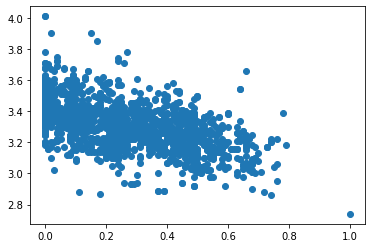

In [38]:
data1 = data[['pH','citric acid']]
plt.scatter(x=data1['citric acid'], y=data1['pH'])
y = data1['pH']
x = data1[['citric acid']]

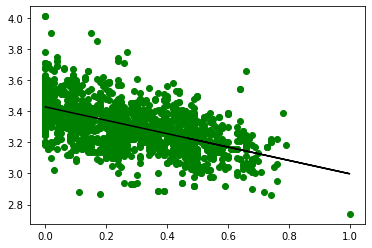

In [39]:
model = lm.LinearRegression()
model.fit(x,y)
plt.scatter(x, y,color='g')
plt.plot(x, model.predict(x),color='k')
plt.show()

In [40]:
#can we predict the pH of the wine using 
#citric acid and residual sugar?
data2 = data[['pH','citric acid','residual sugar']]
y = data2['pH']
x = data2[['citric acid', 'residual sugar']]
model = lm.LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

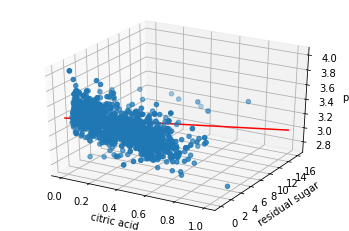

In [41]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(data2['citric acid'],     data2['residual sugar'],data2['pH'])
threedee.set_xlabel('citric acid')
threedee.set_ylabel('residual sugar')
threedee.set_zlabel('pH')
xline = np.linspace(0, 1, 100)
yline = np.linspace(0, 16, 100)
zline = xline*(-0.429) + yline*(-0.000877)+3.430
threedee.plot3D(xline, yline, zline, 'red')
plt.show()

#Standardized Test Performance

In [42]:
test_data = "https://raw.githubusercontent.com/PacktWorkshops/The-Statistics-and-Calculus-with-Python-Workshop/master/Chapter09/Activity9.01/pisa_test_scores.csv"

In [44]:
data = pd.read_csv(test_data)

In [45]:
print("For Math:")
t_confidence_interval(list(data['Math']),0.95)
print("For Reading:")
t_confidence_interval(list(data['Reading']),0.95)
print("For Science:")
t_confidence_interval(list(data['Science']),0.95)

For Math:
Your 0.95 t confidence interval is (448.2561338314995,473.6869804542148)
For Reading:
Your 0.95 t confidence interval is (449.1937943789569,472.80078847818595)
For Science:
Your 0.95 t confidence interval is (453.8991748650865,476.9790108491992)


(453.8991748650865, 476.9790108491992)

In [46]:
# Using A Hypothesis Test, evaluate whether having 
# widespread internet infrastructure could have an 
# impact on scores
# We need to divide the data set into majority 
# internet (more than 50 users out of 100) and 
# minority internet(50 users or less) 
data1 = data[data['internet_users_per_100'] > 50]
data0 = data[data['internet_users_per_100'] <= 50]
print(data1)
print(data0)

   Country Code  internet_users_per_100      Math   Reading   Science
0           ALB               63.252933  413.1570  405.2588  427.2250
1           ARE               90.500000  427.4827  433.5423  436.7311
2           ARG               68.043064  409.0333  425.3031  432.2262
3           AUS               84.560519  493.8962  502.9006  509.9939
4           AUT               83.940142  496.7423  484.8656  495.0375
..          ...                     ...       ...       ...       ...
62          SWE               90.610200  493.9181  500.1556  493.4224
64          TTO               69.198471  417.2434  427.2733  424.5905
66          TUR               53.744979  420.4540  428.3351  425.4895
67          URY               64.600000  417.9919  436.5721  435.3630
68          USA               74.554202  469.6285  496.9351  496.2424

[63 rows x 5 columns]
   Country Code  internet_users_per_100      Math   Reading   Science
19          DZA               38.200000  359.6062  349.8593  375.74

In [47]:
# We will use the 2 Sample T Test function from the Scipy package
import scipy.stats as sp

# We want to see if scores are higher for Data1, so we will put that first and divide the p-value by two
math_test_results = sp.ttest_ind(data1['Math'],data0['Math'],equal_var=False)
print(r'For Math: (note - statistic must be positive in order for there to be significance.)')
print(math_test_results.statistic)
print(math_test_results.pvalue / 2)

# We want to see if scores are higher for Data1, so we will put that first and divide the p-value by two
reading_test_results = sp.ttest_ind(data1['Reading'],data0['Reading'],equal_var=False)
print(r'For Reading: (note - statistic must be positive in order for there to be significance.)')
print(reading_test_results.statistic)
print(reading_test_results.pvalue / 2)


# We want to see if scores are higher for Data1, so we will put that first and divide the p-value by two
science_test_results = sp.ttest_ind(data1['Science'],data0['Science'],equal_var=False)
print(r'For Science: (note - statistic must be positive in order for there to be significance.)')
print(science_test_results.statistic)
print(science_test_results.pvalue / 2)

For Math: (note - statistic must be positive in order for there to be significance.)
3.6040958108257892
0.0036618262642996464
For Reading: (note - statistic must be positive in order for there to be significance.)
3.8196670837378237
0.0028727977455195778
For Science: (note - statistic must be positive in order for there to be significance.)
2.734488895919944
0.01425936325938158


In [48]:
# Construct a Linear Model that can predict math scores from reading and science scores
y = data['Math']
x = data[['Science','Reading']]

model = lm.LinearRegression()
model.fit(x,y)

print(model.coef_)
print(model.intercept_)

[1.02301989 0.0516567 ]
-38.99549267679225


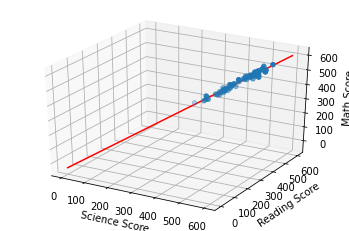

In [49]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(data['Science'], data['Reading'],data['Math'])
threedee.set_xlabel('Science Score')
threedee.set_ylabel('Reading Score')
threedee.set_zlabel('Math Score')

xline = np.linspace(0, 600, 600)
yline = np.linspace(0, 600, 600)
zline = xline*1.02301989 + yline*0.0516567-38.99549267679242
threedee.plot3D(xline, yline, zline, 'red')

plt.show()